In [441]:
# !pip install pyts

In [442]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from pyts.image import MarkovTransitionField

import scipy
from scipy.io import loadmat

from pywt import wavedec


from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold,cross_validate
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression 
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import sklearn.svm as svm 
import sklearn.naive_bayes as naive_bayes


import tensorflow.compat.v1 as tf
from tensorflow import keras as K
from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Activation, Flatten, concatenate, Input, Dropout,Conv1D, LSTM, Bidirectional,BatchNormalization,PReLU,ReLU,Reshape
from tensorflow.keras.layers import Conv1D,Conv2D,Add
from tensorflow.keras.layers import MaxPool1D, MaxPooling2D
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils.np_utils import to_categorical

import seaborn as sns

import xgboost as xgb

In [444]:
subject = 4

classify = 'Coco_vs_Imagenet'

# change classify accordingly

not_include = 2

# not_include = 0 -- Imagenet Vs Sun
# not_include = 1 -- Coco vs sun
# not_include = 2 -- Coco vs Imagenet

In [445]:
input_data = pd.read_csv("/kaggle/input/time-series-data/Final_inputs_"+str(subject)+".csv")
output_data = pd.read_csv("/kaggle/input/time-series-data/Final_outputs_"+str(subject)+".csv")

In [446]:
input_data

,img1,img2,img3,img4,img5,img6,img7,img8,img9,img10,...,img28,img29,img30,img31,img32,img33,img34,img35,img36,img37
0,-1.239142,1.498891,0.189638,-2.929628,-0.790091,-2.478041,0.988637,2.322696,-1.337394,-0.523618,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.473891,-1.775369,2.018271,0.087563,-0.136596,0.963593,0.074364,0.475535,-1.887757,-1.601759,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.732457,0.878624,-3.116104,0.704959,2.981228,-0.287656,-0.802391,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.574738,-2.062863,3.955059,-3.664877,-6.586027,1.369082,3.764334,3.962135,-1.449717,-8.435167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.398529,-6.506147,-0.266727,1.759737,-5.126099,2.003309,1.808564,-4.672224,-8.855239,0.902672,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,-1.856298,3.044136,-1.374764,0.523651,1.256430,3.026562,-6.559871,-1.638449,0.638746,-7.805001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10823,6.040045,-1.295440,10.394622,3.305884,1.982401,4.278109,2.383811,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10824,-4.434929,-1.159476,-3.856269,-0.269374,1.879222,-2.862106,4.419580,-1.912875,5.539759,-2.705979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10825,-0.956519,1.020237,-2.005922,-2.228816,2.067930,-0.088604,-3.029148,-1.539736,3.780307,-2.550555,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [447]:
output_data

,label
0,0
1,1
2,2
3,0
4,1
...,...
10822,1
10823,2
10824,0
10825,1


In [448]:
lst = []
length = len(output_data)
for i in range(length):
    if float(output_data['label'][i]) == not_include:
        lst.append(i)

output_data.drop(output_data.index[lst], inplace = True)
input_data.drop(input_data.index[lst], inplace = True)

In [449]:
x = input_data.to_numpy()
y = output_data.to_numpy()

In [450]:
# not_include = 0 -- Imagenet Vs Sun
# not_include = 1 -- Coco vs sun
# not_include = 2 -- Coco vs Imagenet

# not_include = 0 -- Uncomment both
# not_include = 1 -- Comment 1st one
# not_include = 2 -- Comment both


# for i in range(len(y)):
#     if y[i] == 1:
#         y[i] = 0
        
# for i in range(len(y)):
#     if y[i] == 2:
#         y[i] = 1

if(not_include == 0):
    classify = 'Coco_vs_Sun'
    for i in range(len(y)):
        if y[i] == 1:
            y[i] = 0

    for i in range(len(y)):
        if y[i] == 2:
            y[i] = 1
            
elif(not_include == 1):
    classify = 'Imagenet_vs_Sun'
    for i in range(len(y)):
        if y[i] == 2:
            y[i] = 1

In [451]:
x

array([[-1.23914196,  1.49889081,  0.18963832, ...,  0.        ,
         0.        ,  0.        ],
       [-0.47389088, -1.77536935,  2.01827123, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.57473786, -2.06286342,  3.95505863, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.85629841,  3.04413568, -1.37476398, ...,  0.        ,
         0.        ,  0.        ],
       [-4.43492914, -1.15947552, -3.85626921, ...,  0.        ,
         0.        ,  0.        ],
       [-0.95651905,  1.02023691, -2.0059221 , ...,  0.        ,
         0.        ,  0.        ]])

In [452]:
y

array([[0],
       [1],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [453]:
x = StandardScaler().fit_transform(x)

In [454]:
x

array([[-0.30187197,  0.35578148,  0.08741479, ...,  0.        ,
         0.        ,  0.        ],
       [-0.09723217, -0.45715102,  0.54338519, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.7180176 , -0.52852998,  1.02632397, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.466909  ,  0.73943449, -0.3026696 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.15647414, -0.30423706, -0.921434  , ...,  0.        ,
         0.        ,  0.        ],
       [-0.22629429,  0.2369414 , -0.46004915, ...,  0.        ,
         0.        ,  0.        ]])

In [455]:
len(y[0])

1

In [456]:
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [457]:
# x_train.shape

In [458]:
mtf = MarkovTransitionField(image_size=37)

In [459]:
x = mtf.fit_transform(x)

/opt/conda/lib/python3.7/site-packages/pyts/preprocessing/discretizer.py:171: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [0 1 2 3 4 5]. Consider decreasing the number of bins or removing these samples.
  .format(samples))


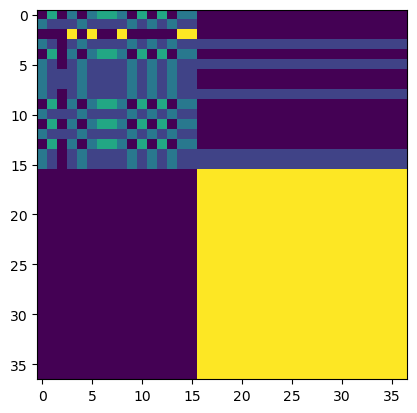

In [460]:
plt.imshow(x[0])

In [461]:
x.shape

(7218, 37, 37)

In [462]:
x = x.reshape(x.shape[0], 37, 37,1)

In [463]:
x.shape

(7218, 37, 37, 1)

In [464]:
model = models.Sequential()
model.add(layers.Conv2D(37, (2, 2), activation='relu', input_shape=(37, 37,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_110"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_330 (Conv2D)         (None, 36, 36, 37)        185       
                                                                 
 max_pooling2d_220 (MaxPooli  (None, 18, 18, 37)       0         
 ng2D)                                                           
                                                                 
 conv2d_331 (Conv2D)         (None, 17, 17, 64)        9536      
                                                                 
 max_pooling2d_221 (MaxPooli  (None, 8, 8, 64)         0         
 ng2D)                                                           
                                                                 
 conv2d_332 (Conv2D)         (None, 7, 7, 64)          16448     
                                                                 
 flatten_110 (Flatten)       (None, 3136)           

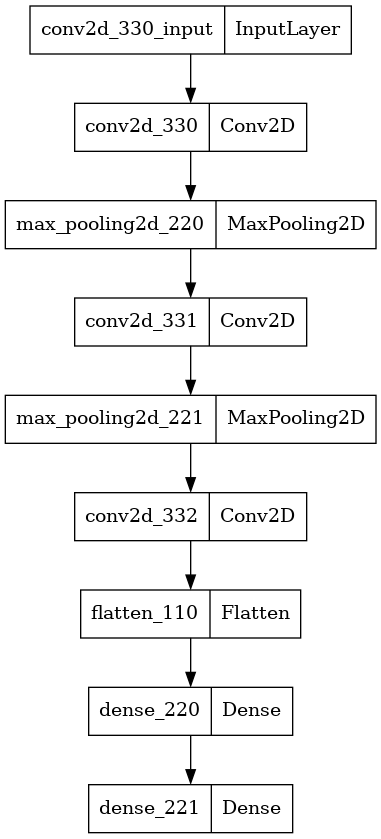

In [465]:
tf.keras.utils.plot_model(model)

In [466]:
def train_model(model,x_train, y_train,x_test,y_test, save_to, epoch = 2):

        opt_adam = keras.optimizers.Adam(learning_rate=0.001)

        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
        mc = ModelCheckpoint(save_to + '_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
        lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))
        
        model.compile(optimizer=opt_adam,loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])
        
        history = model.fit(x_train,y_train,
                        batch_size=20,
                        epochs=epoch,
                        validation_data=(x_test,y_test),
                        callbacks=[es,mc,lr_schedule]
                           )
        
        model = load_model(save_to + '_best_model.h5')
        
        return model,history

In [467]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

acc_per_fold = []
loss_per_fold = []
true_labels = []
pred_labels = []
pred_probs = []

fold_no = 1

In [468]:
# model = load_model('./_best_model.h5')
for train, test in kfold.split(x,y): 
    model = models.Sequential()
    model.add(layers.Conv2D(37, (2, 2), activation='relu', input_shape=(37, 37,1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (2, 2), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (2, 2), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model,history = train_model(model, x[train], y[train], x[test], y[test], save_to= './', epoch = 50) 


    scores = model.evaluate(x[test], y[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    #   print("***************************************************\n")
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    
    y_pred = model.predict(x[test])
    pred_probs.extend(y_pred)
    y_hat = np.array(y_pred >= 0.5, dtype = int)
    true_labels.extend(y[test])
    pred_labels.extend(y_hat)

    # Increase fold number
    fold_no = fold_no + 1

Epoch 1/50


/opt/conda/lib/python3.7/site-packages/keras/backend.py:5677: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits, "Sigmoid", "binary_crossentropy"


321/325 [============================>.] - ETA: 0s - loss: 0.6861 - accuracy: 0.5550
Epoch 1: val_accuracy improved from -inf to 0.57064, saving model to ./_best_model.h5
325/325 [==============================] - 4s 6ms/step - loss: 0.6861 - accuracy: 0.5550 - val_loss: 0.6788 - val_accuracy: 0.5706 - lr: 0.0010
Epoch 2/50
325/325 [==============================] - ETA: 0s - loss: 0.6669 - accuracy: 0.5950
Epoch 2: val_accuracy did not improve from 0.57064
325/325 [==============================] - 2s 5ms/step - loss: 0.6669 - accuracy: 0.5950 - val_loss: 0.6740 - val_accuracy: 0.5651 - lr: 9.0484e-04
Epoch 3/50
324/325 [============================>.] - ETA: 0s - loss: 0.6523 - accuracy: 0.6119
Epoch 3: val_accuracy improved from 0.57064 to 0.58587, saving model to ./_best_model.h5
325/325 [==============================] - 2s 5ms/step - loss: 0.6523 - accuracy: 0.6121 - val_loss: 0.6716 - val_accuracy: 0.5859 - lr: 8.1873e-04
Epoch 4/50
315/325 [============================>.] - ETA

In [469]:
print(acc_per_fold)

[62.04985976219177, 65.09695053100586, 63.296401500701904, 61.49584650993347, 61.49584650993347, 61.63434982299805, 60.110801458358765, 63.98891806602478, 61.71983480453491, 63.522887229919434]


In [470]:
acc = np.mean(acc_per_fold)
acc ="{0:0.2f}".format(acc*0.01)
acc

'0.62'

In [471]:
print(classification_report(true_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.61      0.68      0.64      3609
           1       0.64      0.57      0.60      3609

    accuracy                           0.62      7218
   macro avg       0.63      0.62      0.62      7218
weighted avg       0.63      0.62      0.62      7218



In [472]:
precision = classification_report(true_labels, pred_labels)[291:295]
precision

'0.63'

In [473]:
recall = classification_report(true_labels, pred_labels)[301:305]
recall

'0.62'

In [474]:
f1 = classification_report(true_labels, pred_labels)[311:315]
f1

'0.62'

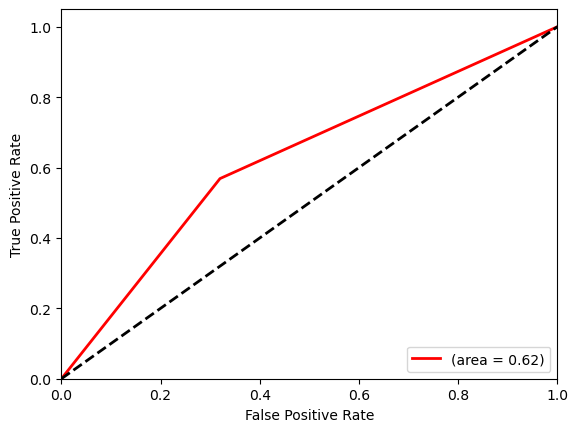

In [475]:
test_yhat = label_binarize(pred_labels, classes=[0, 1])

fpr, tpr, _ = roc_curve(true_labels, test_yhat[:, -1],pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(
    fpr,
    tpr,
    color="red",
    lw=2,
    label="(area = {0:0.2f})".format(roc_auc),
)

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.savefig('./roc_'+str(subject)+'_'+classify+'.png')
plt.show()

In [476]:
roc="{0:0.2f}".format(roc_auc)
roc

'0.62'